### Decision Classification Tree

In [5]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [6]:
clf.predict([[1, 1]])

array([1])

### Decision Classification Tree 구축 및 시각화

In [16]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

In [8]:
iris = load_iris()

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- Decision Classification Tree 구축

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

- 시각화

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

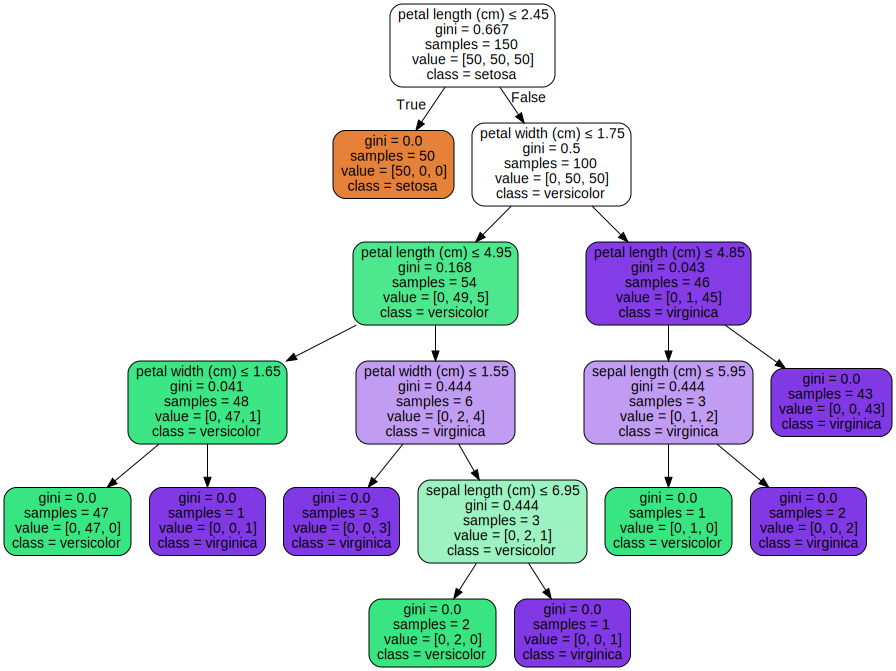

In [13]:
graph
# gini 계수는 엔트로피의 개념과 유사 (무질서 정도, 낮은 값일수록 분류가 잘된 상태를 뜻함)

- 엔트로피를 활용한 트리

In [14]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2 = clf2.fit(iris.data, iris.target)

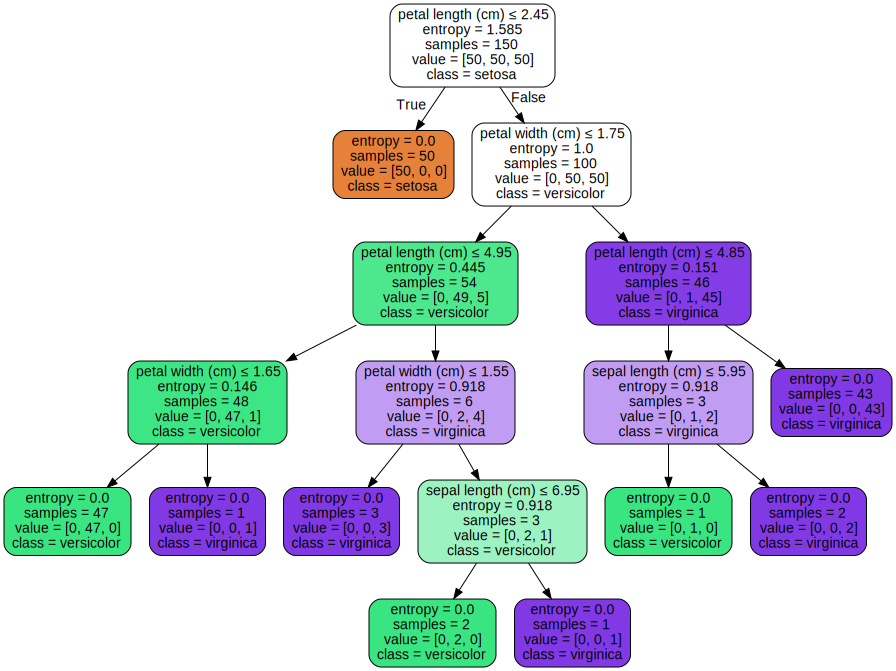

In [15]:
dot_data2 = tree.export_graphviz(clf2, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph2 = graphviz.Source(dot_data2)
graph2

- 프루닝(Prunnig)을 이용한 과적합 방지

In [16]:
clf3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2) # 최대 Depth 를 지정
clf3 = clf3.fit(iris.data, iris.target)

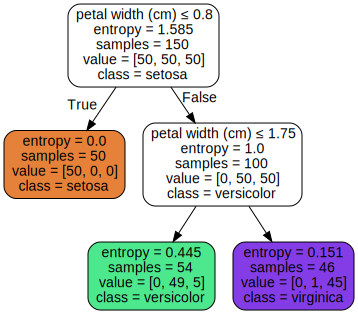

In [17]:
dot_data3 = tree.export_graphviz(clf3, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph3 = graphviz.Source(dot_data3)
graph3

- Confusion matrix 계산

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [19]:
confusion_matrix(iris.target, clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [20]:
"""
clf, clf2 의 경우 학습데이터에 대해 과적합 되어있어 100% 정확도를 갖지만 테스트데이터에 대한 일반화는 되지않음
clf3 의 경우 학습데이터에 대해 100%의 정확도를 갖진 않으나, 테스트데이터에 대한 일반화는 어느정도 완화될수 있음
"""

confusion_matrix(iris.target, clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

- Training/Test 구분 및 Confusion matrix 계산

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)

In [25]:
clf4 = tree.DecisionTreeClassifier(criterion='entropy')

In [26]:
clf4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 11]], dtype=int64)

### Decision Regression Tree

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

- 데이터 생성

In [7]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Regression Tree 구축

In [8]:
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)

In [9]:
regr_1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [10]:
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [11]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [12]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

- 결과 시각화

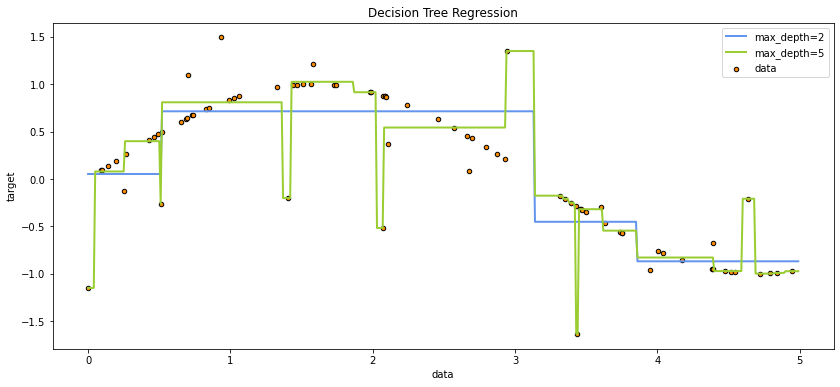

In [13]:
plt.figure(figsize=(14, 6))
plt.scatter(X, y, s=20, edgecolors='black', c='darkorange', label='data')
plt.plot(X_test, y_1, color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_2, color='yellowgreen', label='max_depth=5', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

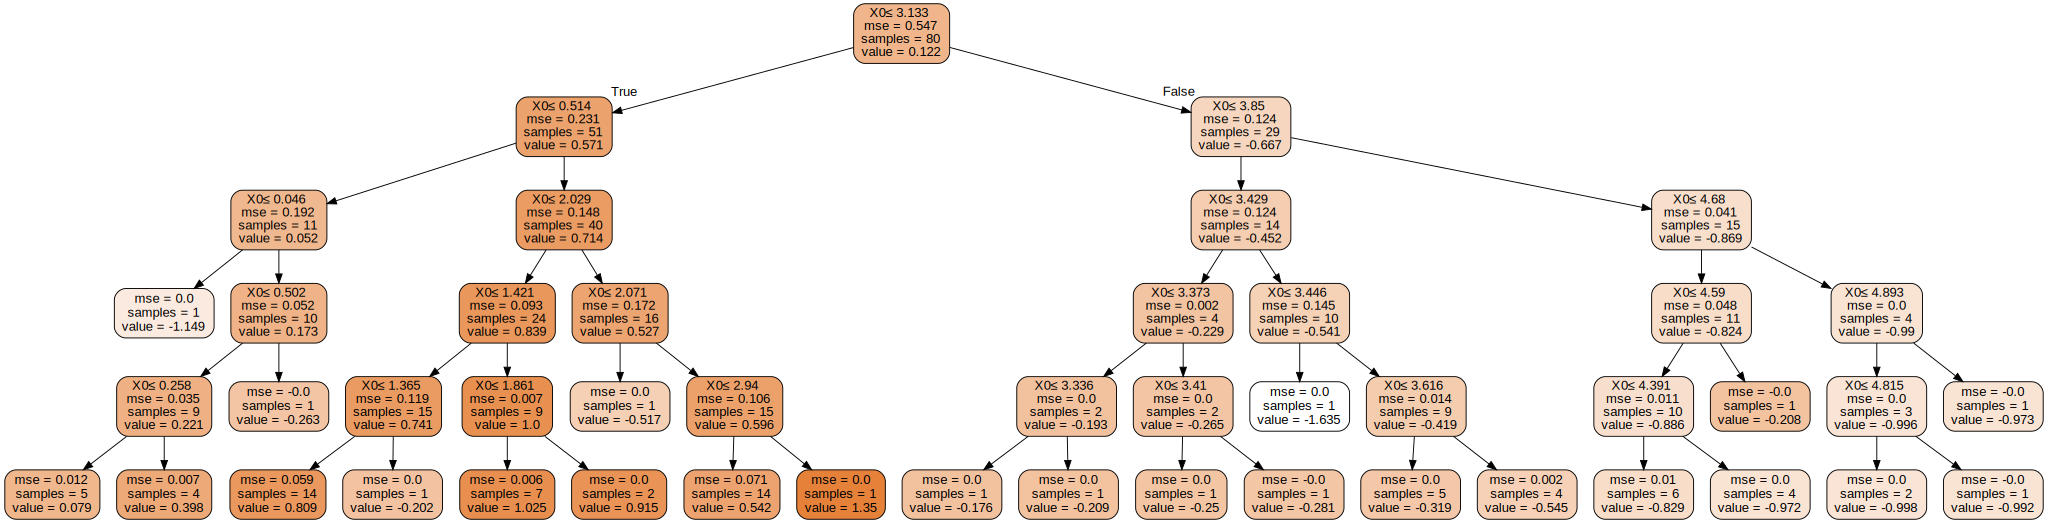

In [17]:
# max_depth = 5 인 경우
dot_data4 = tree.export_graphviz(regr_2, out_file=None, 
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

graph4 = graphviz.Source(dot_data4)
graph4

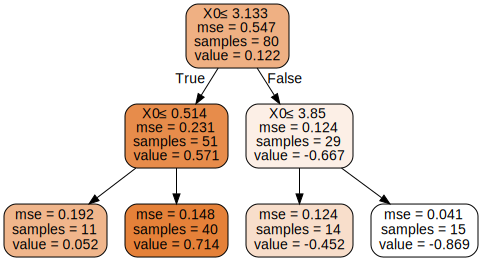

In [18]:
# max_depth = 2 인 경우
dot_data5 = tree.export_graphviz(regr_1, out_file=None, 
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

graph5 = graphviz.Source(dot_data5)
graph5